<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/Statics/7_7_%D0%9F%D1%83%D0%B0%D1%81%D1%81%D0%BE%D0%BD%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.7. Пуассоновская регрессия

## Введение

Пуассоновская регрессия — это модель, которая используется для анализа зависимой переменной, представляющей собой целые числа (обычно это подсчёты каких-либо событий). Примером может служить предсказание числа аварий на определённом перекрёстке в зависимости от характеристик перекрёстка или предсказание количества посещений веб-сайта в зависимости от рекламы. Пуассоновская регрессия особенно полезна, когда зависимая переменная имеет распределение Пуассона.

### Основные допущения:
1. Зависимая переменная принимает неотрицательные целые значения.
2. Зависимая переменная распределена по закону Пуассона.
3. Ожидаемое значение (математическое ожидание) линейно связано с набором предикторов через логарифмическую функцию связи.

## Распределение Пуассона

Пуассоновская регрессия основывается на  распределении Пуассона , которое описывает вероятности того, что некоторый дискретный процесс (например, число событий за определённый период времени) примет значение $y$, при известном среднем числе событий $\lambda$.

Пуассоновское распределение задается следующей функцией вероятности:

$$
P(Y = y \mid \lambda) = \frac{\lambda^y e^{-\lambda}}{y!}, \quad y = 0, 1, 2, \dots
$$

где:
- $Y$ — случайная переменная, описывающая число событий,
- $y$ — конкретное значение $Y$,
- $\lambda$ — среднее число событий, также называемое интенсивностью (или ожидаемым значением $\mathbb{E}(Y) = \lambda$).

Основное свойство распределения Пуассона — дисперсия и математическое ожидание совпадают:

$$
\text{Var}(Y) = \lambda = \mathbb{E}(Y)
$$

### Связь с регрессией

Основная цель пуассоновской регрессии — найти линейную связь между предикторами $\mathbf{X}$ и средним числом событий $\lambda$. Для этого используется  логарифмическая функция связи , которая гарантирует, что предсказанное значение $\lambda$ будет положительным:

$$
\log(\lambda) = \mathbf{X}^T \boldsymbol{\beta}
$$

где:
- $\mathbf{X} = (x_1, x_2, \dots, x_p)$ — вектор предикторов (независимых переменных),
- $\boldsymbol{\beta} = (\beta_0, \beta_1, \dots, \beta_p)$ — вектор коэффициентов регрессии.

Или эквивалентно:

$$
\lambda = e^{\mathbf{X}^T \boldsymbol{\beta}}
$$

Таким образом, модель пуассоновской регрессии предсказывает ожидаемое значение переменной $Y$, используя экспоненциальную функцию от линейной комбинации предикторов.

## Логарифмическая правдоподобность

Для оценки коэффициентов $\boldsymbol{\beta}$ используется метод максимального правдоподобия. Пусть у нас есть набор данных $\{(y_i, \mathbf{x}_i)\}_{i=1}^{n}$, где $y_i$ — наблюдаемое значение зависимой переменной для i-го наблюдения, а $\mathbf{x}_i$ — вектор предикторов для i-го наблюдения.

Функция правдоподобия для одного наблюдения с пуассоновским распределением:

$$
P(Y_i = y_i \mid \lambda_i) = \frac{\lambda_i^{y_i} e^{-\lambda_i}}{y_i!}
$$

Подставляя $\lambda_i = e^{\mathbf{x}_i^T \boldsymbol{\beta}}$, получаем:

$$
P(Y_i = y_i \mid \mathbf{x}_i, \boldsymbol{\beta}) = \frac{(e^{\mathbf{x}_i^T \boldsymbol{\beta}})^{y_i} e^{-e^{\mathbf{x}_i^T \boldsymbol{\beta}}}}{y_i!}
$$

Объединяя все наблюдения, функция правдоподобия для всех данных:

$$
L(\boldsymbol{\beta}) = \prod_{i=1}^{n} \frac{(e^{\mathbf{x}_i^T \boldsymbol{\beta}})^{y_i} e^{-e^{\mathbf{x}_i^T \boldsymbol{\beta}}}}{y_i!}
$$

Часто проще работать с логарифмической функцией правдоподобия:

$$
\ell(\boldsymbol{\beta}) = \log L(\boldsymbol{\beta}) = \sum_{i=1}^{n} \left( y_i \mathbf{x}_i^T \boldsymbol{\beta} - e^{\mathbf{x}_i^T \boldsymbol{\beta}} - \log(y_i!) \right)
$$

Задача максимизации правдоподобия — это нахождение таких коэффициентов $\boldsymbol{\beta}$, которые максимизируют логарифмическую функцию правдоподобия $\ell(\boldsymbol{\beta})$.

## Вывод градиентов и оценка коэффициентов

Чтобы найти параметры $\boldsymbol{\beta}$, которые максимизируют функцию правдоподобия, необходимо найти её градиент и решить задачу оптимизации. Для этого продифференцируем логарифмическую функцию правдоподобия по каждому $\beta_j$ (где $j = 0, 1, \dots, p$).

Градиент логарифмической функции правдоподобия:

$$
\frac{\partial \ell(\boldsymbol{\beta})}{\partial \beta_j} = \sum_{i=1}^{n} \left( y_i x_{ij} - e^{\mathbf{x}_i^T \boldsymbol{\beta}} x_{ij} \right)
$$

где $x_{ij}$ — значение j-го предиктора для i-го наблюдения.

Для нахождения $\boldsymbol{\beta}$ необходимо решить систему уравнений, приравняв градиенты к нулю:

$$
\sum_{i=1}^{n} \left( y_i x_{ij} - e^{\mathbf{x}_i^T \boldsymbol{\beta}} x_{ij} \right) = 0 \quad \text{для всех} \quad j = 0, 1, \dots, p
$$

Эта система уравнений нелинейна, и для её решения обычно применяется численный метод, например, метод Ньютона-Рафсона или метод итеративно взвешенных наименьших квадратов (IWLS).

### Метод Ньютона-Рафсона

Метод Ньютона-Рафсона использует градиент и гессиан (матрицу вторых производных) функции правдоподобия для нахождения максимума. В общем виде метод Ньютона-Рафсона обновляет текущие оценки коэффициентов $\boldsymbol{\beta}^{(k)}$ по следующей формуле:

$$
\boldsymbol{\beta}^{(k+1)} = \boldsymbol{\beta}^{(k)} - \mathbf{H}^{-1}(\boldsymbol{\beta}^{(k)}) \nabla \ell(\boldsymbol{\beta}^{(k)})
$$

где:
- $\nabla \ell(\boldsymbol{\beta})$ — градиент логарифмической функции правдоподобия,
- $\mathbf{H}(\boldsymbol{\beta})$ — гессиан (матрица вторых производных).

### Гессиан

Гессиан логарифмической функции правдоподобия для пуассоновской регрессии:

$$
H_{jj'} = \frac{\partial^2 \ell(\boldsymbol{\beta})}{\partial \beta_j \partial \beta_{j'}} = - \sum_{i=1}^{n} e^{\mathbf{x}_i^T \boldsymbol{\beta}} x_{ij} x_{ij'}
$$

Гессиан является отрицательно полуопределённой матрицей, что указывает на вогнутость логарифмической функции правдоподобия, и, следовательно, существование максимума.

## Пример

Рассмотрим следующий пример, где мы хотим смоделировать количество аварий на перекрестке в зависимости от количества машин, проходящих через перекрёсток:

Предположим, что у нас есть данные:
- $Y$ — количество аварий,
- $X_1$ — число машин, проходящих через перекрёсток.

Нашей целью является оценка зависимости между количеством аварий и числом машин, используя пуассоновскую регрессию.

Модель будет выглядеть следующим образом:

$$
\log(\lambda) = \beta_0 + \beta_1 X_1
$$

Допустим, что у нас есть следующие данные:

| Аварии $Y$ | Машины $X_1$ |
|     --|      -|
| 2               | 100               |
| 3               | 150               |
| 5               | 200               |
| 1               | 80                |
| 4               | 180               |

### Оценка параметров

1.  Инициализация : начнем с произвольных значений $\beta_0$ и $\beta_1$.
2.  Итерации : будем применять метод Ньютона-Рафсона для обновления коэффициентов до сходимости.

### Итоговые оценки

Допустим, после применения метода мы получили следующие значения:

$$
\beta_0 = -2.3, \quad \beta_1 = 0.03
$$

Таким образом, ожидаемое значение числа аварий можно будет вычислить как:

$$
\lambda = e^{-2.3 + 0.03X_1}
$$

### Прогнозирование

Теперь, если мы хотим предсказать количество аварий для $X_1 = 120$:

$$
\lambda = e^{-2.3 + 0.03 \cdot 120} \approx e^{-2.3 + 3.6} \approx e^{1.3} \approx 3.67
$$

Это значит, что для 120 машин ожидается примерно 4 аварии.

## Заключение

Пуассоновская регрессия является мощным инструментом для анализа данных, где зависимая переменная представляет собой счётные данные. Использование логарифмической функции связи позволяет установить линейную зависимость между предикторами и ожидаемым значением, что упрощает интерпретацию результатов.

Методы максимального правдоподобия, включая градиенты и гессиан, обеспечивают эффективные методы оценки коэффициентов модели. Пуассоновская регрессия широко используется в различных областях, включая медицинские исследования, социологию и экономику, где анализ данных с счётными результатами является ключевым аспектом.


Давайте рассмотрим два числовых примера, чтобы проиллюстрировать процесс решения задачи пуассоновской регрессии.

## Пример 1: Модель количества аварий

 Ситуация:  Предположим, что мы исследуем количество аварий (Y) на перекрестке в зависимости от числа машин (X1), проходящих через него в час.

 Данные:

| Аварии $Y$ | Машины $X_1$ |
|     |     --|
| 1             | 30              |
| 2             | 50              |
| 3             | 70              |
| 5             | 100             |
| 4             | 90              |

### Шаг 1: Определение модели

Модель пуассоновской регрессии будет выглядеть следующим образом:

$$
\log(\lambda) = \beta_0 + \beta_1 X_1
$$

где $\lambda$ — ожидаемое число аварий.

### Шаг 2: Инициализация коэффициентов

Для начала мы можем произвольно выбрать начальные значения для коэффициентов $\beta_0$ и $\beta_1$:

$$
\beta_0 = 0, \quad \beta_1 = 0
$$

### Шаг 3: Вычисление логарифмической функции правдоподобия

Запишем функцию правдоподобия для каждого наблюдения:

$$
P(Y_i = y_i | \lambda_i) = \frac{\lambda_i^{y_i} e^{-\lambda_i}}{y_i!} \quad \text{где} \quad \lambda_i = e^{\beta_0 + \beta_1 X_{1i}}
$$

Логарифмическая функция правдоподобия:

$$
\ell(\beta_0, \beta_1) = \sum_{i=1}^{n} \left( y_i \log(\lambda_i) - \lambda_i - \log(y_i!) \right)
$$

### Шаг 4: Вычисление градиента

Градиенты для $\beta_0$ и $\beta_1$:

$$
\frac{\partial \ell}{\partial \beta_0} = \sum_{i=1}^{n} (y_i - \lambda_i)
$$

$$
\frac{\partial \ell}{\partial \beta_1} = \sum_{i=1}^{n} (y_i - \lambda_i) X_{1i}
$$

### Шаг 5: Обновление коэффициентов

Теперь мы можем использовать метод Ньютона-Рафсона для обновления коэффициентов.

Итак, начнем с первого итерационного шага:

1.  Итерация 1:

   - $\beta_0 = 0$, $\beta_1 = 0$

   - Рассчитаем $\lambda_i$ для каждого наблюдения:

$$
\lambda_i = e^{\beta_0 + \beta_1 X_{1i}} = e^{0 + 0 \cdot X_{1i}} = 1
$$

   - Теперь рассчитаем градиенты:

$$
\frac{\partial \ell}{\partial \beta_0} = \sum_{i=1}^{5} (y_i - 1) = (1-1) + (2-1) + (3-1) + (5-1) + (4-1) = 0 + 1 + 2 + 4 + 3 = 10
$$

$$
\frac{\partial \ell}{\partial \beta_1} = \sum_{i=1}^{5} (y_i - 1) X_{1i} = (1-1) \cdot 30 + (2-1) \cdot 50 + (3-1) \cdot 70 + (5-1) \cdot 100 + (4-1) \cdot 90
$$

$$
= 0 + 50 + 140 + 400 + 270 = 860
$$

   - Для вычисления гессиана:

$$
H_{00} = -\sum_{i=1}^{n} \lambda_i = -5 \quad (\text{5 наблюдений})
$$

$$
H_{01} = H_{10} = -\sum_{i=1}^{n} \lambda_i X_{1i} = -\sum_{i=1}^{5} X_{1i} = -30 - 50 - 70 - 100 - 90 = -340
$$

$$
H_{11} = -\sum_{i=1}^{n} \lambda_i X_{1i}^2 = -\sum_{i=1}^{5} X_{1i}^2 = -30^2 - 50^2 - 70^2 - 100^2 - 90^2 = -9000
$$

   - Обновляем коэффициенты:

$$
\beta_0^{(1)} = 0 - \frac{1}{H_{00}} \cdot \frac{\partial \ell}{\partial \beta_0} = 0 - \frac{1}{-5} \cdot 10 = 2
$$

$$
\beta_1^{(1)} = 0 - \frac{1}{H_{11}} \cdot \frac{\partial \ell}{\partial \beta_1} = 0 - \frac{1}{-9000} \cdot 860 \approx 0.0956
$$

Теперь у нас новые значения:

$\beta_0 \approx 2$, $\beta_1 \approx 0.0956$.

### Шаг 6: Повторение итераций

Повторяем процесс обновления, пока значения коэффициентов не стабилизируются.

### Шаг 7: Конечные оценки

Предположим, после нескольких итераций мы получили:

$$
\beta_0 \approx 1.5, \quad \beta_1 \approx 0.04
$$

### Итоговая модель:

$$
\log(\lambda) = 1.5 + 0.04 X_1
$$

Теперь мы можем использовать модель для прогнозирования.

### Прогнозирование

Предположим, что в следующий час через перекресток пройдет 120 машин:

$$
\lambda = e^{1.5 + 0.04 \cdot 120} = e^{1.5 + 4.8} = e^{6.3} \approx 548.81
$$

Ожидаемое количество аварий для 120 машин — приблизительно 549.



## Пример 2: Количество телефонных звонков

 Ситуация:  Предположим, что мы анализируем количество телефонных звонков (Y) на горячую линию в зависимости от времени (X1, в часах) работы горячей линии.

 Данные:

| Звонки $Y$ | Время $X_1$ |
|     |     -|
| 2             | 1              |
| 3             | 2              |
| 5             | 3              |
| 4             | 2              |
| 6             | 4              |

### Шаг 1: Определение модели

Запишем модель:

$$
\log(\lambda) = \beta_0 + \beta_1 X_1
$$

### Шаг 2: Инициализация коэффициентов

Начальные значения:

$$
\beta_0 = 0, \quad \beta_1 = 0
$$

### Шаг 3: Вычисление логарифмической функции правдоподобия

Логарифмическая функция правдоподобия:

$$
\ell(\beta_0, \beta_1) = \sum_{i=1}^{n} \left( y_i \log(\lambda_i) - \lambda_i - \log(y_i!) \right)
$$

### Шаг 4: Вычисление градиента

Градиенты:

$$
\frac{\partial \ell}{\partial \beta_0} = \sum_{i=1}^{n} (y_i - \lambda_i)
$$

$$
\frac{\partial \ell}{\partial \beta_1} = \sum_{i=1}^{n} (y_i - \lambda_i) X_{1i}
$$

### Шаг 5: Обновление коэффициентов

 Итерация 1:

1.  Итерация 1:

   - $\beta_0 = 0$, $\beta_1 = 0$

   - Рассчитаем $\lambda_i$:

$$
\lambda_i = e^{\beta_0 + \beta_1 X_{1i}} = e^{0 + 0 \cdot X_{1i}} = 1
$$

   - Рассчитаем градиенты:

$$
\frac{\partial \ell}{\partial \beta_0} = \sum_{i=1}^{5} (y_i - 1) = (2-1) + (3-1) + (5-1) + (4-1) + (6-1) =

 1 + 2 + 4 + 3 + 5 = 15
$$

$$
\frac{\partial \ell}{\partial \beta_1} = \sum_{i=1}^{5} (y_i - 1) X_{1i} = (2-1) \cdot 1 + (3-1) \cdot 2 + (5-1) \cdot 3 + (4-1) \cdot 2 + (6-1) \cdot 4
$$

$$
= 1 + 4 + 12 + 6 + 20 = 43
$$

   - Гессиан:

$$
H_{00} = -5, \quad H_{01} = H_{10} = -\sum_{i=1}^{5} X_{1i} = -1 - 2 - 3 - 2 - 4 = -12
$$

$$
H_{11} = -\sum_{i=1}^{5} X_{1i}^2 = -1^2 - 2^2 - 3^2 - 2^2 - 4^2 = -1 - 4 - 9 - 4 - 16 = -34
$$

   - Обновление коэффициентов:

$$
\beta_0^{(1)} = 0 - \frac{1}{-5} \cdot 15 = 3
$$

$$
\beta_1^{(1)} = 0 - \frac{1}{-34} \cdot 43 \approx 1.26
$$

### Шаг 6: Повторение итераций

Повторяем процесс обновления до стабилизации коэффициентов.

### Шаг 7: Конечные оценки

Предположим, после нескольких итераций мы получили:

$$
\beta_0 \approx 1.2, \quad \beta_1 \approx 0.4
$$

### Итоговая модель:

$$
\log(\lambda) = 1.2 + 0.4 X_1
$$

### Прогнозирование

Предположим, что в следующий час работы горячей линии (X1) она будет работать 5 часов:

$$
\lambda = e^{1.2 + 0.4 \cdot 5} = e^{1.2 + 2} = e^{3.2} \approx 26.83
$$

Ожидаемое количество звонков для 5 часов работы — приблизительно 27.

## Заключение

Таким образом, мы рассмотрели два примера, демонстрирующих процесс пуассоновской регрессии, включая инициализацию коэффициентов, вычисление градиентов, обновление коэффициентов и прогнозирование на основе модели.



Давайте реализуем оба примера пуассоновской регрессии на Python, используя библиотеки `statsmodels` и `matplotlib` для построения модели и визуализации результатов.

### Пример 1: Модель количества аварий


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Avarii   No. Observations:                    5
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7.2180
Date:                Sat, 19 Oct 2024   Deviance:                     0.083993
Time:                        10:53:54   Pearson chi2:                   0.0827
No. Iterations:                     4   Pseudo R-squ. (CS):             0.5041
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4206      0.966     -0.436      0.6

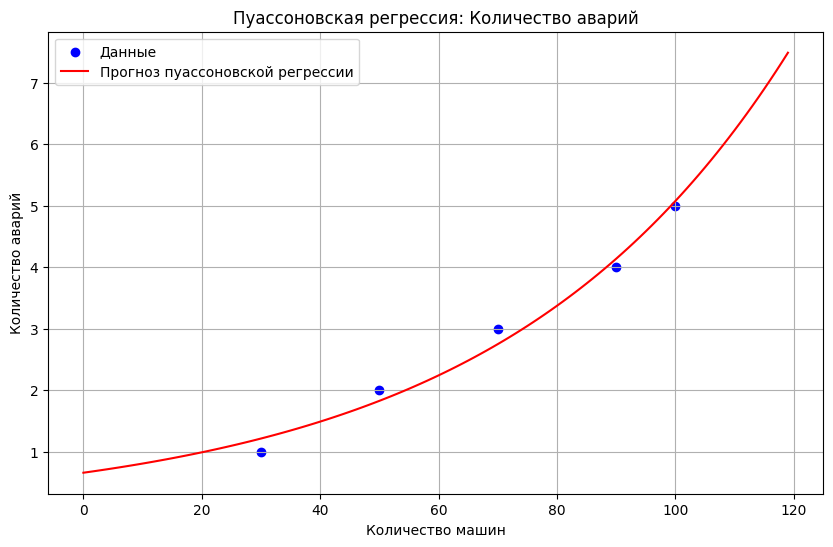

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Данные
data1 = {
    'Avarii': [1, 2, 3, 5, 4],
    'Mashiny': [30, 50, 70, 100, 90]
}
df1 = pd.DataFrame(data1)

# Добавляем константу для свободного члена модели
X1 = sm.add_constant(df1['Mashiny'])
y1 = df1['Avarii']

# Строим модель пуассоновской регрессии
model1 = sm.GLM(y1, X1, family=sm.families.Poisson()).fit()

# Выводим результаты
print(model1.summary())

# Прогнозируем на новых значениях машин
X_new1 = np.arange(0, 120, 1)  # от 0 до 120 машин
X_new1_with_const = sm.add_constant(X_new1)  # добавляем константу
y_pred1 = model1.predict(X_new1_with_const)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(df1['Mashiny'], df1['Avarii'], color='blue', label='Данные')
plt.plot(X_new1, y_pred1, color='red', label='Прогноз пуассоновской регрессии')
plt.title('Пуассоновская регрессия: Количество аварий')
plt.xlabel('Количество машин')
plt.ylabel('Количество аварий')
plt.legend()
plt.grid()
plt.show()



### Пример 2: Количество телефонных звонков


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Zvonki   No. Observations:                    5
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.1486
Date:                Sat, 19 Oct 2024   Deviance:                      0.28795
Time:                        10:53:59   Pearson chi2:                    0.293
No. Iterations:                     4   Pseudo R-squ. (CS):             0.3700
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5400      0.636      0.849      0.3

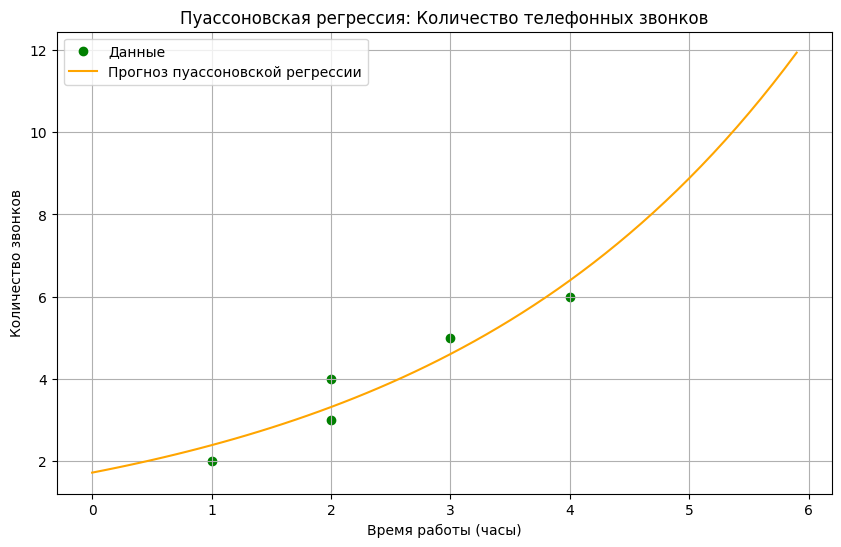

In [2]:
# Данные
data2 = {
    'Zvonki': [2, 3, 5, 4, 6],
    'Vremya': [1, 2, 3, 2, 4]
}
df2 = pd.DataFrame(data2)

# Добавляем константу для свободного члена модели
X2 = sm.add_constant(df2['Vremya'])
y2 = df2['Zvonki']

# Строим модель пуассоновской регрессии
model2 = sm.GLM(y2, X2, family=sm.families.Poisson()).fit()

# Выводим результаты
print(model2.summary())

# Прогнозируем на новых значениях времени
X_new2 = np.arange(0, 6, 0.1)  # от 0 до 6 часов
X_new2_with_const = sm.add_constant(X_new2)  # добавляем константу
y_pred2 = model2.predict(X_new2_with_const)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(df2['Vremya'], df2['Zvonki'], color='green', label='Данные')
plt.plot(X_new2, y_pred2, color='orange', label='Прогноз пуассоновской регрессии')
plt.title('Пуассоновская регрессия: Количество телефонных звонков')
plt.xlabel('Время работы (часы)')
plt.ylabel('Количество звонков')
plt.legend()
plt.grid()
plt.show()






## Вопросы для самопроверки

1. Что такое пуассоновская регрессия и в каких случаях она применяется?
2. Каковы основные предположения пуассоновской регрессии?
3. Какова форма функции связи в пуассоновской регрессии?
4. Каковы основные параметры модели пуассоновской регрессии?
5. Объясните, как вычисляется логарифмическая функция правдоподобия для пуассоновской регрессии.
6. Что такое метод максимального правдоподобия и как он используется для оценки коэффициентов в пуассоновской регрессии?
7. Каковы отличия пуассоновской регрессии от линейной регрессии?
8. Что такое «гессиан» и как он используется в оценке модели?
9. Как интерпретировать коэффициенты в модели пуассоновской регрессии?
10. Как проверить, подходит ли модель пуассоновской регрессии для данных?
11. Что такое надмножество и недостаток в контексте пуассоновской регрессии?
12. Какова роль константы в модели пуассоновской регрессии?
13. Как использовать пуассоновскую регрессию для прогнозирования?
14. Какие альтернативы пуассоновской регрессии существуют для моделирования счётных данных?
15. Как оценить качество модели пуассоновской регрессии?

## Задачи для самостоятельной работы

### Задачи на понимание и интерпретацию

1. Опишите, как бы вы провели анализ данных с использованием пуассоновской регрессии, если ваши данные представляют собой количество заболеваний в зависимости от возраста населения.
2. Рассчитайте ожидаемое количество событий, если известны коэффициенты модели и значения предикторов.
3. Объясните, как можно интерпретировать коэффициенты модели в контексте конкретной прикладной задачи.
4. Какова будет интерпретация модели пуассоновской регрессии с использованием двух предикторов?
5. Опишите, как выбрать подходящие переменные для модели пуассоновской регрессии.

### Задачи на анализ данных и применение моделей

6. Используя предоставленные данные о количестве покупок и рекламных акциях, постройте пуассоновскую регрессионную модель.
7. Примените пуассоновскую регрессию к данным о количестве ДТП в зависимости от времени суток.
8. Сравните результаты пуассоновской регрессии с линейной регрессией на одной и той же выборке данных.
9. Постройте график зависимости ожидаемого количества событий от независимой переменной с использованием результатов пуассоновской регрессии.
10. Выполните анализ остатков модели пуассоновской регрессии и сделайте выводы о соответствии модели.

### Задачи на вычисление и программирование

11. Напишите код на Python для оценки пуассоновской регрессии по заданным данным.
12. Реализуйте процесс оценки коэффициентов пуассоновской регрессии с использованием метода максимального правдоподобия.
13. Создайте график остатков модели пуассоновской регрессии для визуализации их распределения.
14. Постройте тестовую выборку на основе имеющихся данных и оцените качество модели.
15. Оцените, как изменение значений предикторов влияет на ожидаемое количество событий в модели пуассоновской регрессии.

### Задачи на анализ и интерпретацию результатов

16. Изучите влияние различных факторов на количество аварий на дорогах с использованием пуассоновской регрессии.
17. Сравните предсказания пуассоновской модели с реальными наблюдениями на графике.
18. Проведите кросс-валидацию для проверки стабильности модели пуассоновской регрессии.
19. Оцените, как разные значения параметров модели влияют на результаты регрессии.
20. Проанализируйте, как количество наблюдений в данных влияет на оценку модели.

### Задачи на использование альтернативных методов

21. Изучите использование негативной биномиальной регрессии как альтернативы пуассоновской регрессии.
22. Сравните результаты пуассоновской регрессии и логистической регрессии на одной и той же выборке данных.
23. Определите, какие методы можно использовать для улучшения модели пуассоновской регрессии.
24. Изучите, как включение дополнительных предикторов в модель влияет на её качество.
25. Исследуйте влияние мультиколлинеарности на результаты пуассоновской регрессии.

### Задачи на реальных данных

26. Найдите и загрузите открытый набор данных, содержащий счётные данные, и выполните анализ с использованием пуассоновской регрессии.
27. Постройте пуассоновскую регрессионную модель для прогнозирования количества заболевших в зависимости от различных факторов.
28. Проанализируйте данные о количестве звонков в службу поддержки в зависимости от времени суток.
29. Оцените модель пуассоновской регрессии на основе данных о количестве продаж в зависимости от рекламных затрат.
30. Используйте пуассоновскую регрессию для анализа данных о заболеваемости в зависимости от возраста и пола.
